In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

In [2]:
from pyspark.sql.types import (StructField,StringType,IntegerType,FloatType,StructType,DateType,TimestampType)
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import mean
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import functions as F
from pyspark.sql.window import Window

In [3]:
df = spark.read.csv("./Measurement_summary.csv",inferSchema=True,header="true" )

In [4]:
df.show()

+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+
|Measurement_date|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM25|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+
|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|  73|  57|
|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|  71|  59|
|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|  59|
|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|  58|
|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|  69|  61|
|   2017/1/1 5:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.046|0.002|1.1|  70|  61|
|   2017/1/1 6:00|         1

In [5]:
df.columns

['Measurement_date',
 'Station_code',
 'Address',
 'Latitude',
 'Longitude',
 'SO2',
 'NO2',
 'O3',
 'CO',
 'PM10',
 'PM25']

In [6]:
df.head(2)

[Row(Measurement_date='2017/1/1 0:00', Station_code=101, Address='19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea', Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.059, O3=0.002, CO=1.2, PM10=73, PM25=57),
 Row(Measurement_date='2017/1/1 1:00', Station_code=101, Address='19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea', Latitude=37.5720164, Longitude=127.0050075, SO2=0.004, NO2=0.058, O3=0.002, CO=1.2, PM10=71, PM25=59)]

In [7]:
df.count()

647511

In [8]:
df.printSchema()

root
 |-- Measurement_date: string (nullable = true)
 |-- Station_code: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: integer (nullable = true)
 |-- PM25: integer (nullable = true)



In [9]:
df.describe().show()

+-------+----------------+------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-----------------+------------------+
|summary|Measurement_date|      Station_code|             Address|           Latitude|          Longitude|                 SO2|                NO2|                  O3|                 CO|             PM10|              PM25|
+-------+----------------+------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-----------------+------------------+
|  count|          647511|            647511|              647511|             647511|             647511|              647294|             647511|              647511|             647511|           647511|            647511|
|   mean|            null|113.00022084566903|                null|  37.55348357387394| 126.98933

In [9]:
plot1=df.groupBy("PM25").count().orderBy("PM25")

In [10]:
plot1.count()

333

In [ ]:
plot1.show(333)

In [32]:
df.select([count(when(isnan(c)|col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------------+------------+-------+--------+---------+---+---+---+---+----+----+
|Measurement_date|Station_code|Address|Latitude|Longitude|SO2|NO2| O3| CO|PM10|PM25|
+----------------+------------+-------+--------+---------+---+---+---+---+----+----+
|               0|           0|      0|       0|        0|217|  0|  0|  0|   0|   0|
+----------------+------------+-------+--------+---------+---+---+---+---+----+----+



In [22]:
quantiles = df.approxQuantile("PM25", [0.25,0.998], 0.00)

In [23]:
quantiles[1]

171.0

In [25]:
quantiles10 = df.approxQuantile("PM25", [0.25,0.99], 0.00)
quantiles10[1]

100.0

In [4]:
df2=df.filter("Station_code=101")

In [10]:
df2.count()

25905

In [34]:
df2.show(5)

+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+
|Measurement_date|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM25|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+
|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|  73|  57|
|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|  71|  59|
|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|  59|
|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|  70|  58|
|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|  69|  61|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+
only showing top 5 rows



In [11]:
df2.select([count(when(isnan(c)|col(c).isNull(), c)).alias(c) for c in df2.columns]).show()

+----------------+------------+-------+--------+---------+---+---+---+---+----+----+
|Measurement_date|Station_code|Address|Latitude|Longitude|SO2|NO2| O3| CO|PM10|PM25|
+----------------+------------+-------+--------+---------+---+---+---+---+----+----+
|               0|           0|      0|       0|        0| 26|  0|  0|  0|   0|   0|
+----------------+------------+-------+--------+---------+---+---+---+---+----+----+



In [5]:
mean_SO2 = df2.select(mean(df2['SO2'])).collect()

In [6]:
mean_SO2[0][0]

0.004308126279995904

In [6]:
mean_SO2_val = mean_SO2[0][0]

In [7]:
df3=df2.na.fill(mean_SO2_val, subset=['SO2'])

In [8]:
df3.select([count(when(isnan(c)|col(c).isNull(), c)).alias(c) for c in df3.columns]).show()

+----------------+------------+-------+--------+---------+---+---+---+---+----+----+
|Measurement_date|Station_code|Address|Latitude|Longitude|SO2|NO2| O3| CO|PM10|PM25|
+----------------+------------+-------+--------+---------+---+---+---+---+----+----+
|               0|           0|      0|       0|        0|  0|  0|  0|  0|   0|   0|
+----------------+------------+-------+--------+---------+---+---+---+---+----+----+



In [41]:
df3.describe().show()

+-------+----------------+------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+------------------+-----------------+------------------+
|summary|Measurement_date|Station_code|             Address|         Latitude|         Longitude|                 SO2|                 NO2|                  O3|                CO|             PM10|              PM25|
+-------+----------------+------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+------------------+-----------------+------------------+
|  count|           25905|       25905|               25905|            25905|             25905|               25905|               25905|               25905|             25905|            25905|             25905|
|   mean|            null|       101.0|                null|37.57201640002134|127.00500749994949|0.004308126279995...|0.030516348195

In [9]:
mean_CO=df3.select(mean(df2['CO'])).collect()

In [10]:
mean_PM10=df3.select(mean(df2['PM10'])).collect()

In [11]:
mean_PM25=df3.select(mean(df2['PM25'])).collect()

In [12]:
mean_NO2=df3.select(mean(df2['NO2'])).collect()

In [13]:
mean_O3=df3.select(mean(df2['O3'])).collect()

In [14]:
df4 = df3.withColumn("SO2", \
              when(df3["SO2"] == -1,mean_SO2_val ).otherwise(df3["SO2"])).withColumn("NO2", \
              when(df3["NO2"] == -1,mean_NO2[0][0] ).otherwise(df3["NO2"])).withColumn("O3", \
              when(df3["O3"] == -1,mean_O3[0][0] ).otherwise(df3["O3"])).withColumn("CO", \
              when(df3["CO"] == -1,mean_CO[0][0] ).otherwise(df3["CO"])).withColumn("PM10", \
              when(df3["PM10"] == -1,mean_PM10[0][0] ).otherwise(df3["PM10"])).withColumn("PM25", \
              when(df3["PM25"] == -1,mean_PM25[0][0] ).otherwise(df3["PM25"]))

In [22]:
df4.describe("SO2","NO2","PM10","PM25","CO","O3").show(truncate = False)

+-------+--------------------+--------------------+------------------+------------------+------------------+--------------------+
|summary|SO2                 |NO2                 |PM10              |PM25              |CO                |O3                  |
+-------+--------------------+--------------------+------------------+------------------+------------------+--------------------+
|count  |25905               |25905               |25905             |25905             |25905             |25905               |
|mean   |0.004385664062376209|0.03163020489285626 |38.01073028963004 |22.889122526553802|0.5854755987284198|0.024624145914049864|
|stddev |0.004811476912778703|0.016596226285800948|27.395879348007718|19.982107179194774|0.4781151915162288|0.01910201575997793 |
|min    |0.0                 |0.0                 |0.0               |0.0               |0.0               |0.0                 |
|max    |0.406               |0.109               |516.0             |513.0             |4

In [78]:
quantiles = df4.approxQuantile("PM25", [0.25,0.987], 0.0)
print(quantiles[1],quantiles[0])

85.0 11.0


In [79]:
IQR = quantiles[1] - quantiles[0]
bounds = {}
bounds["PM25"] = [quantiles[0] - 1.5*IQR, quantiles[1] + 1.5*IQR]
print("bounds: ",bounds)

bounds:  {'PM25': [-100.0, 196.0]}


In [81]:
quantiles2 = df4.approxQuantile("PM10", [0.25,0.96], 0.0)
print(quantiles2[1],quantiles2[0])

92.0 21.0


In [82]:
IQR2 = quantiles2[1] - quantiles2[0]
bounds = {}
bounds["PM10"] = [quantiles2[0] - 1.5*IQR2, quantiles2[1] + 1.5*IQR2]
print("bounds: ",bounds)

bounds:  {'PM10': [-85.5, 198.5]}


In [15]:
df5 = df4.withColumn("PM10", \
              when(df4["PM10"] >199,mean_PM10[0][0] ).otherwise(df4["PM10"])).withColumn("PM25", \
              when(df4["PM25"] >196,mean_PM25[0][0] ).otherwise(df4["PM25"]))

In [24]:
df5.describe("PM10","PM25").show()

+-------+------------------+------------------+
|summary|              PM10|              PM25|
+-------+------------------+------------------+
|  count|             25905|             25905|
|   mean| 37.51481102558707|22.561284814181356|
| stddev|24.751142376615665| 17.37208797651781|
|    min|               0.0|               0.0|
|    max|             199.0|             191.0|
+-------+------------------+------------------+



In [16]:
from pyspark.sql.functions import monotonically_increasing_id

In [17]:
df6 = df5.withColumn("id", monotonically_increasing_id())

In [88]:
df6.show()

+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+
|Measurement_date|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM25| id|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+
|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|73.0|57.0|  0|
|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|71.0|59.0|  1|
|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|59.0|  2|
|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|58.0|  3|
|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|69.0|61.0|  4|
|   2017/1/1 5:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.046|0.002|1.1|70.0|61

In [18]:
my_window = Window.partitionBy().orderBy("id")
df6=df6.withColumn("pre",F.lag(df6.PM25).over(my_window))

In [90]:
df6.show()

+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+
|Measurement_date|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM25| id| pre|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+
|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|73.0|57.0|  0|null|
|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|71.0|59.0|  1|57.0|
|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|59.0|  2|59.0|
|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|58.0|  3|59.0|
|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|69.0|61.0|  4|58.0|
|   2017/1/1 5:00|         101|19, Jong-ro 35ga-...|37.5720164|1

In [19]:
df6=df6.withColumn("diff",F.when(F.isnull(df6.PM25-df6.pre),0).otherwise(df6.PM25-df6.pre))

In [92]:
df6.show()

+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+----+
|Measurement_date|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM25| id| pre|diff|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+----+
|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|73.0|57.0|  0|null| 0.0|
|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|71.0|59.0|  1|57.0| 2.0|
|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|59.0|  2|59.0| 0.0|
|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|58.0|  3|59.0|-1.0|
|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|69.0|61.0|  4|58.0| 3.0|
|   2017/1/1 5:00|      

In [20]:
df_s = spark.read.csv("./status5.csv",header="true" )

In [30]:
df_s.show(2)
df_s.printSchema()
df_s.count()

+----------------+------+
|Measurement_date|status|
+----------------+------+
|   2017/1/1 0:00|     0|
|   2017/1/1 1:00|     0|
+----------------+------+
only showing top 2 rows

root
 |-- Measurement_date: string (nullable = true)
 |-- status: string (nullable = true)



25905

In [21]:
df_n = df6.join(df_s, df5.Measurement_date == df_s.Measurement_date,how='left').drop(df_s.Measurement_date)

In [36]:
df_n.show(5)

+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+----+------+
|Measurement_date|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM25| id| pre|diff|status|
+----------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+----+------+
|   2017/1/1 0:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|73.0|57.0|  0|null| 0.0|     0|
|   2017/1/1 1:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|71.0|59.0|  1|57.0| 2.0|     0|
|   2017/1/1 2:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|59.0|  2|59.0| 0.0|     0|
|   2017/1/1 3:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|58.0|  3|59.0|-1.0|     0|
|   2017/1/1 4:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|

In [37]:
df_n.count()

25905

In [38]:
df_n.printSchema()

root
 |-- Measurement_date: string (nullable = true)
 |-- Station_code: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- SO2: double (nullable = false)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- PM25: double (nullable = true)
 |-- id: long (nullable = false)
 |-- pre: double (nullable = true)
 |-- diff: double (nullable = true)
 |-- status: string (nullable = true)



In [22]:
from pyspark.sql.functions import unix_timestamp, col
from pyspark.sql.types import TimestampType

In [23]:
df7 = df_n.select(unix_timestamp(df_n.Measurement_date, 'yyyy/MM/dd HH:mm').cast(TimestampType()).alias("timestamp"),
                  "Station_code","Address","Latitude","Longitude","SO2","NO2","O3","CO","PM10","PM25","id","diff","status")
df7.show()

+--------------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+------+
|           timestamp|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM25| id|diff|status|
+--------------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+----+---+----+------+
|2017-01-01 00:00:...|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|73.0|57.0|  0| 0.0|     0|
|2017-01-01 01:00:...|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|71.0|59.0|  1| 2.0|     0|
|2017-01-01 02:00:...|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|59.0|  2| 0.0|     0|
|2017-01-01 03:00:...|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0|58.0|  3|-1.0|     0|
|2017-01-01 04:00:...|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|69.

In [25]:
df7.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- Station_code: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- SO2: double (nullable = false)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- PM25: double (nullable = true)
 |-- id: long (nullable = false)
 |-- diff: double (nullable = true)
 |-- status: string (nullable = true)



In [24]:
#selectdata=df7.select("SO2","NO2","O3","CO","PM10","PM25","diff","status")
selectdata=df7.select("SO2","NO2","O3","CO","PM10","PM25","diff")

In [25]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,
                                OneHotEncoder,StringIndexer)
from pyspark.ml.linalg import Vectors

In [77]:
stringIndexer = StringIndexer(inputCol="status", outputCol="statusIndex")
model = stringIndexer.fit(selectdata)
indexed = model.transform(selectdata)

In [78]:
encoder = OneHotEncoder(inputCol="statusIndex", outputCol="statusVec")
encoded = encoder.transform(indexed)

In [40]:
plot2=selectdata.groupBy("status").count().orderBy("status")
plot2.show()

+------+-----+
|status|count|
+------+-----+
|     0|25362|
|     1|  172|
|     2|  118|
|     4|   43|
|     8|   64|
|     9|  146|
+------+-----+



In [79]:
encoded.show()

+-----+-----+-----+---+----+----+----+------+-----------+-------------+
|  SO2|  NO2|   O3| CO|PM10|PM25|diff|status|statusIndex|    statusVec|
+-----+-----+-----+---+----+----+----+------+-----------+-------------+
|0.004|0.059|0.002|1.2|73.0|57.0| 0.0|     0|        0.0|(5,[0],[1.0])|
|0.004|0.058|0.002|1.2|71.0|59.0| 2.0|     0|        0.0|(5,[0],[1.0])|
|0.004|0.056|0.002|1.2|70.0|59.0| 0.0|     0|        0.0|(5,[0],[1.0])|
|0.004|0.056|0.002|1.2|70.0|58.0|-1.0|     0|        0.0|(5,[0],[1.0])|
|0.003|0.051|0.002|1.2|69.0|61.0| 3.0|     0|        0.0|(5,[0],[1.0])|
|0.003|0.046|0.002|1.1|70.0|61.0| 0.0|     0|        0.0|(5,[0],[1.0])|
|0.003|0.049|0.002|1.1|66.0|57.0|-4.0|     0|        0.0|(5,[0],[1.0])|
|0.003|0.045|0.002|1.0|71.0|60.0| 3.0|     0|        0.0|(5,[0],[1.0])|
|0.004|0.047|0.002|1.1|72.0|60.0| 0.0|     0|        0.0|(5,[0],[1.0])|
|0.003|0.047|0.002|1.1|74.0|63.0| 3.0|     0|        0.0|(5,[0],[1.0])|
|0.004|0.045|0.004|1.0|76.0|68.0| 5.0|     0|        0.0|(5,[0],

In [58]:
assembler = VectorAssembler(
    inputCols=["SO2", "NO2","O3","CO","PM10","diff"],
    outputCol="features")

In [27]:
output = assembler.transform(selectdata)

In [28]:
output.printSchema()
output.head(1)

root
 |-- SO2: double (nullable = false)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- PM25: double (nullable = true)
 |-- diff: double (nullable = true)
 |-- features: vector (nullable = true)



[Row(SO2=0.004, NO2=0.059, O3=0.002, CO=1.2, PM10=73.0, PM25=57.0, diff=0.0, features=DenseVector([0.004, 0.059, 0.002, 1.2, 73.0, 0.0]))]

In [29]:
final_data = output.select("features",'PM25')
final_data.show()

+--------------------+----+
|            features|PM25|
+--------------------+----+
|[0.004,0.059,0.00...|57.0|
|[0.004,0.058,0.00...|59.0|
|[0.004,0.056,0.00...|59.0|
|[0.004,0.056,0.00...|58.0|
|[0.003,0.051,0.00...|61.0|
|[0.003,0.046,0.00...|61.0|
|[0.003,0.049,0.00...|57.0|
|[0.003,0.045,0.00...|60.0|
|[0.004,0.047,0.00...|60.0|
|[0.003,0.047,0.00...|63.0|
|[0.004,0.045,0.00...|68.0|
|[0.004,0.048,0.00...|74.0|
|[0.004,0.054,0.00...|79.0|
|[0.005,0.05,0.007...|79.0|
|[0.006,0.055,0.00...|78.0|
|[0.006,0.056,0.00...|69.0|
|[0.006,0.063,0.00...|69.0|
|[0.005,0.063,0.00...|72.0|
|[0.005,0.063,0.00...|69.0|
|[0.005,0.062,0.00...|70.0|
+--------------------+----+
only showing top 20 rows



In [30]:
train_data,test_data = final_data.randomSplit([0.8,0.2])

In [77]:
train_data.show()
train_data.describe().show()

+--------------------+------------------+
|            features|              PM25|
+--------------------+------------------+
|           (6,[],[])|               0.0|
|           (6,[],[])|               0.0|
|(6,[2,5],[0.063,-...|               0.0|
|(6,[2,5],[0.1,-44...|               0.0|
|(6,[4,5],[4.0,16....|22.850453580389885|
|(6,[4,5],[25.0,-6...|              11.0|
|(6,[4,5],[30.0,-1...|              10.0|
|     (6,[5],[-33.0])|               0.0|
|     (6,[5],[-27.0])|               0.0|
|(6,[5],[-22.85045...|               0.0|
|(6,[5],[-22.85045...|               0.0|
|     (6,[5],[-20.0])|               0.0|
|     (6,[5],[-20.0])|               0.0|
|     (6,[5],[-17.0])|               0.0|
|     (6,[5],[-16.0])|               0.0|
|     (6,[5],[-15.0])|               0.0|
|     (6,[5],[-12.0])|               0.0|
|[0.0,0.0,0.006,0....|              12.0|
|[0.0,0.0,0.025,0....|               9.0|
|[0.0,0.0,0.027,0....|              10.0|
+--------------------+------------

In [76]:
test_data.show()
test_data.describe().show()

+--------------------+----+
|            features|PM25|
+--------------------+----+
|           (6,[],[])| 0.0|
|           (6,[],[])| 0.0|
|     (6,[5],[-31.0])| 0.0|
|     (6,[5],[-26.0])| 0.0|
|     (6,[5],[-16.0])| 0.0|
|[0.0,0.004,0.005,...|13.0|
|[0.001,0.01,0.043...| 7.0|
|[0.001,0.011,0.02...| 6.0|
|[0.001,0.012,0.01...| 9.0|
|[0.001,0.012,0.07...|26.0|
|[0.001,0.013,0.00...|16.0|
|[0.001,0.013,0.05...|23.0|
|[0.001,0.014,0.00...| 4.0|
|[0.001,0.014,0.00...|17.0|
|[0.001,0.014,0.01...| 6.0|
|[0.001,0.015,0.01...|13.0|
|[0.001,0.016,0.01...| 5.0|
|[0.001,0.016,0.01...|15.0|
|[0.001,0.016,0.04...| 8.0|
|[0.001,0.017,0.00...|15.0|
+--------------------+----+
only showing top 20 rows

+-------+------------------+
|summary|              PM25|
+-------+------------------+
|  count|              5096|
|   mean|22.567388321414715|
| stddev| 17.22979712241769|
|    min|               0.0|
|    max|             148.0|
+-------+------------------+



In [32]:
from pyspark.ml.regression import LinearRegression

In [33]:
lr = LinearRegression(featuresCol='features', labelCol='PM25', predictionCol='prediction')

In [34]:
correct_model = lr.fit(train_data)

In [35]:
test_results = correct_model.evaluate(test_data)

In [39]:
test_results.residuals.show()
print("RMSE: {}".format(test_results.rootMeanSquaredError))
# Print R-Squared.
print("r2: {}".format(test_results.r2))

+--------------------+
|           residuals|
+--------------------+
|   3.846913708124502|
|   3.846913708124502|
|  13.873210451043933|
|  12.256065815089187|
|   9.021776543179692|
|  1.7482136825129526|
|   2.371876621095433|
|-0.03972485283292393|
|   1.630863494178728|
|    7.84883782876296|
|   4.691486114765626|
|   9.412970615710831|
|   1.856388724538073|
|   5.053015629391151|
|  1.3412581834566009|
|   4.025232097770628|
|   0.846197453169582|
|   4.477217520747983|
|  1.0455953414962575|
| -1.4557858512737951|
+--------------------+
only showing top 20 rows

RMSE: 7.989311242676068
r2: 0.7849479512009978


In [36]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(correct_model.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(correct_model.intercept)))

Coefficients: [-576.1178707470856,119.97644611874391,49.01715378428392,7.644996364400331,0.5184940392557289,0.3234289271909494]


Intercept:-3.846913708124502


In [89]:
lr.extractParamMap()

{Param(parent='LinearRegression_408fbbe148501e538214', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2,
 Param(parent='LinearRegression_408fbbe148501e538214', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.8,
 Param(parent='LinearRegression_408fbbe148501e538214', name='featuresCol', doc='features column name.'): 'features',
 Param(parent='LinearRegression_408fbbe148501e538214', name='fitIntercept', doc='whether to fit an intercept term.'): True,
 Param(parent='LinearRegression_408fbbe148501e538214', name='labelCol', doc='label column name.'): 'PM25',
 Param(parent='LinearRegression_408fbbe148501e538214', name='maxIter', doc='max number of iterations (>= 0).'): 10,
 Param(parent='LinearRegression_408fbbe148501e538214', name='predictionCol', doc='prediction column name.'): 'prediction',
 Param(parent='LinearRegression_408fbbe148501e538214', na

In [90]:
trainingSummary  =  correct_model.summary

In [46]:
print("numIterations: %d" % trainingSummary.totalIterations)

numIterations: 1


In [47]:
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

objectiveHistory: [0.0]


In [108]:
df7.stat.corr("SO2","PM25")

0.17282307850456896

In [111]:
df7.stat.corr("NO2","PM25")

0.5274193953698306

In [112]:
df7.stat.corr("CO","PM25")

0.35807770994631544

In [113]:
df7.stat.corr("O3","PM25")

-0.03001099285915479

In [115]:
df7.stat.corr("Latitude","PM25")

nan

In [116]:
df7.stat.corr("Station_code","PM25")

nan

In [117]:
df7.stat.corr("Longitude","PM25")

nan

In [118]:
df7.stat.corr("PM10","PM25")

0.8500864132405491

In [119]:
df7.stat.corr("diff","PM25")

0.18482124840808153

In [48]:
print("meanAbsoluteError: %f" % trainingSummary.meanAbsoluteError)

meanAbsoluteError: 5.209406


In [49]:
print("meanSquaredError: %f" % trainingSummary.meanSquaredError)


meanSquaredError: 73.096173


In [53]:
trainingSummary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
|-2.0525060566629776|
| -4.087930682093408|
| 1.7426674661873847|
| -5.187003864425517|
|-12.923276633470389|
| 12.866391707351735|
| -4.012277974535955|
| -4.012277974535955|
+-------------------+
only showing top 20 rows



In [54]:
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 8.549630
r2: 0.758918


In [49]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [60]:
output=assembler.transform(selectdata)

In [78]:
rf = RandomForestRegressor(labelCol="PM25", featuresCol="features",numTrees=20)

In [83]:
model_rf= rf.fit(train_data)

In [84]:
prediction_rf = model_rf.transform(test_data)

In [85]:
prediction_rf.show()

+--------------------+----+------------------+
|            features|PM25|        prediction|
+--------------------+----+------------------+
|           (6,[],[])| 0.0| 6.618850906476887|
|           (6,[],[])| 0.0| 6.618850906476887|
|     (6,[5],[-31.0])| 0.0| 6.304186987790945|
|     (6,[5],[-26.0])| 0.0| 6.304186987790945|
|     (6,[5],[-16.0])| 0.0| 6.304186987790945|
|[0.0,0.004,0.005,...|13.0| 13.36299402208679|
|[0.001,0.01,0.043...| 7.0| 6.764743508513815|
|[0.001,0.011,0.02...| 6.0| 6.554872987001653|
|[0.001,0.012,0.01...| 9.0| 8.625008195873296|
|[0.001,0.012,0.07...|26.0|14.756561582494308|
|[0.001,0.013,0.00...|16.0|11.517308587343035|
|[0.001,0.013,0.05...|23.0|14.427933499362481|
|[0.001,0.014,0.00...| 4.0| 6.721498795779889|
|[0.001,0.014,0.00...|17.0| 11.95690227671579|
|[0.001,0.014,0.01...| 6.0| 6.515243020999224|
|[0.001,0.015,0.01...|13.0| 8.684794586646978|
|[0.001,0.016,0.01...| 5.0| 6.515243020999224|
|[0.001,0.016,0.01...|15.0| 10.30461875988648|
|[0.001,0.016

In [88]:
import matplotlib.pyplot as plt
evaluator = RegressionEvaluator(labelCol="PM25", predictionCol="prediction", metricName="rmse")

In [89]:
rmse = evaluator.evaluate(prediction_rf)

In [91]:
rfPred = model_rf.transform(final_data)

In [92]:
rfResult = rfPred.toPandas()

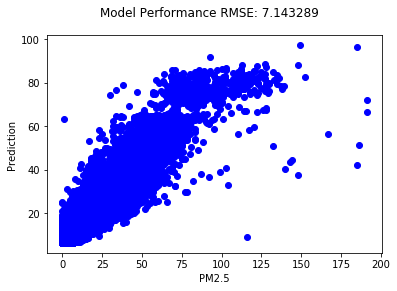

In [95]:
plt.plot(rfResult.PM25, rfResult.prediction, 'bo')
plt.xlabel('PM2.5')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

In [98]:
model_rf.featureImportances

SparseVector(6, {0: 0.0318, 1: 0.0683, 2: 0.0241, 3: 0.2669, 4: 0.5803, 5: 0.0285})

In [101]:
importances=model_rf.featureImportances

In [104]:
x_values = list(range(len(importances)))
feature_list = ["SO2", "NO2","O3","CO","PM10","diff"]

Text(0.5,1,'Feature Importances')

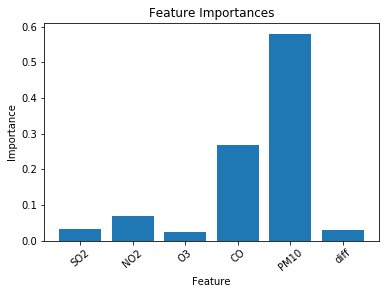

In [105]:
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')